In [1]:
import os
import os.path as osp
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
BASE_PATH =  "../TPS_experiments/cifar-6-8-tr300/"

In [9]:
csv = {"0a": "svm-linear/beta_poison_k30_gaussian2_kernel.csv", 
       "0b": "svm-linear/beta_poison_k30_gaussian2_kernel_l1.csv",
       "0c": "svm-linear/beta_poison_k30_gaussian2_kernel_max.csv",
       
       "1a": "mlp1/beta_poison_k30_gaussian2_kernel.csv", 
       "1b": "mlp1/beta_poison_k30_gaussian2_kernel_l1.csv",
       "1c": "mlp1/beta_poison_k30_gaussian2_kernel_max.csv",
       
       "2a": "mlp3/beta_poison_k30_gaussian2_kernel.csv", 
       "2b": "mlp3/beta_poison_k30_gaussian2_kernel_l1.csv",
       "2c": "mlp3/beta_poison_k30_gaussian2_kernel_max.csv",
      }

In [10]:
legend = {"0a": "$L_2norm$",  
          "0b": "$L_1norm$",
          "0c": "$L_\infty norm$",

          "1a": "$L_2norm$",  
          "1b": "$L_1norm$",
          "1c": "$L_\infty norm$",

          "2a": "$L_2norm$",  
          "2b": "$L_1norm$",
          "2c": "$L_\infty norm$",
          }

In [11]:
title = {"0": "SVM-Linear C=1", 
    
        "1": "MLP 1 Hidden Layer",
       
        "2": "MLP 3 Hidden Layer",
        }

In [12]:
sns.set_style("white")

In [13]:
import matplotlib

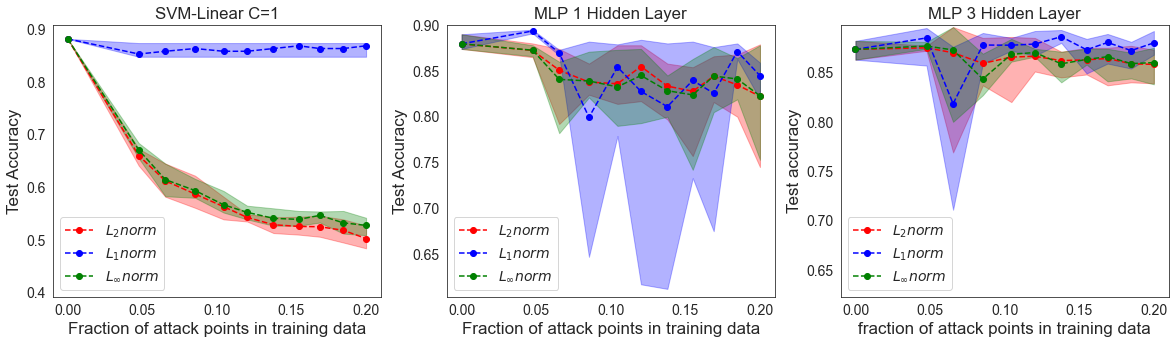

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
C = 1


for column in range(3):
    plt.rcParams.update({'font.size': 14})

    df_a = pd.read_csv(BASE_PATH + csv[str(column) + "a"])
    df_a = df_a.loc[df_a['c '] == C]
    
    df_b = pd.read_csv(BASE_PATH + csv[str(column) + "b"])
    df_b = df_b.loc[df_b['c '] == C]
    
    df_c = pd.read_csv(BASE_PATH + csv[str(column) + "c"])
    df_c = df_c.loc[df_c['c '] == C]
    
    beta_agg_a = df_a.groupby("poison_fraction ")['test_acc '].agg(low='min',high='max',mean='mean')
    beta_agg_a.reset_index(inplace=True)

    beta_agg_b = df_b.groupby("poison_fraction ")['test_acc '].agg(low='min',high='max',mean='mean')
    beta_agg_b.reset_index(inplace=True)

    beta_agg_c = df_c.groupby("poison_fraction ")['test_acc '].agg(low='min',high='max',mean='mean')
    beta_agg_c.reset_index(inplace=True)
  
    
    beta_agg_a.plot(x='poison_fraction ', y='mean', c='r', 
                    linestyle='--', marker='o', ax=axes[column],
                    label=legend[str(column) + "a"])

    beta_agg_b.plot(x='poison_fraction ', y='mean', c='b', 
                    linestyle='--', marker='o', ax=axes[column],
                    label=legend[str(column) + "b"])

    beta_agg_c.plot(x='poison_fraction ', y='mean', c='g', 
                    linestyle='--', marker='o', ax=axes[column],
                    label=legend[str(column) + "c"])



    axes[column].fill_between(x='poison_fraction ',y1='low',y2='high', data=beta_agg_a, color=(1., 0., 0., 0.3))
    axes[column].fill_between(x='poison_fraction ',y1='low',y2='high', data=beta_agg_b, color=(0., 0., 1., 0.3))
    axes[column].fill_between(x='poison_fraction ',y1='low',y2='high', data=beta_agg_c, color=(0.0, 0.5, 0.0, 0.3))

    axes[column].set_xlabel("Fraction of attack points in training data", fontsize=17)
    axes[column].set_ylabel("Test Accuracy", fontsize=17)
    axes[column].set_title(title[str(column)])
    plt.setp(axes[column], ylim=(beta_agg_a["low"].min()*0.81,beta_agg_a["low"].max()*1.03))
    axes[column].xaxis.set_ticks(np.arange(0, 0.21, 0.05))


# for ax in fig.get_axes():
#     ax.label_outer()
plt.xlabel("fraction of attack points in training data")
plt.ylabel('Test accuracy')
plt.savefig("cifar-norm.png")

In [14]:
C=1

In [10]:
titles = ["$L_2norm$", "$L_1norm$", "$L_\infty norm$"]
fill_colors = [(1., 0., 0., 0.3), (0., 0., 1., 0.3), (0., 1., 0., 0.3)]
plot_colors = ["r", "b", "g"]

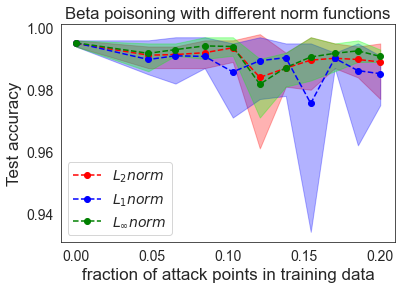

In [11]:
ax = plt.subplot()
sns.set_style("white")
for i, csv_file in enumerate([ "beta_poison_k15.csv", "beta_poison_k15_l1norm.csv", "beta_poison_k15_infnorm.csv"]):
    path = osp.join(BASE_PATH, "mlp3",csv_file)
    
    plt.rcParams.update({'font.size': 14})

    df_a = pd.read_csv(path)
    df_a = df_a.loc[df_a['c '] == C]
    

    beta_agg_a = df_a.groupby("poison_fraction ")['test_acc '].agg(low='min',high='max',mean='mean')
    beta_agg_a.reset_index(inplace=True)

    beta_agg_a.plot(x='poison_fraction ', y='mean', c=plot_colors[i],
                    linestyle='--', marker='o', ax=ax,
                    label=titles[i])

    ax.fill_between(x='poison_fraction ',y1='low',y2='high', data=beta_agg_a, color=fill_colors[i])

    ax.set_xlabel("Fraction of attack points in training data", fontsize=17)
    ax.set_ylabel("Test Accuracy", fontsize=17)
    ax.set_title("Beta poisoning with different norm functions")
    ax.xaxis.set_ticks(np.arange(0, 0.21, 0.05))

plt.xlabel("fraction of attack points in training data")
plt.ylabel('Test accuracy')
plt.savefig("norm_functions_c1.png", bbox_inches='tight')

In [19]:
titles = ["Gaussian KDE", "Epanechnikov KDE", "Logistic KDE"]
fill_colors = [(1., 0., 0., 0.3), (0., 0., 1., 0.3), (0., 1., 0., 0.3)]
plot_colors = ["r", "b", "g"]
C = 1
fontsize = 14

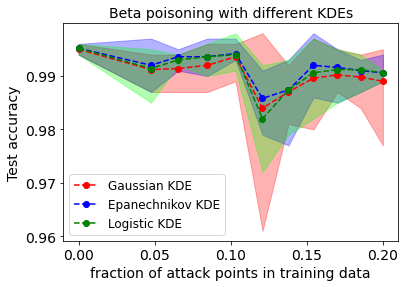

In [30]:
ax = plt.subplot()

for i, csv_file in enumerate([ "beta_poison_k15.csv", "beta_poison_k15_epanechnikov_kernel.csv", "beta_poison_k15_logistic_kernel.csv"]):
    path = osp.join(BASE_PATH, "mlp3",csv_file)
    
    plt.rcParams.update({'font.size': fontsize})

    df_a = pd.read_csv(path)
    df_a = df_a.loc[df_a['c '] == C]
    

    beta_agg_a = df_a.groupby("poison_fraction ")['test_acc '].agg(low='min',high='max',mean='mean')
    beta_agg_a.reset_index(inplace=True)

    beta_agg_a.plot(x='poison_fraction ', y='mean', c=plot_colors[i],
                    linestyle='--', marker='o', ax=ax,
                    label=titles[i])

    ax.fill_between(x='poison_fraction ',y1='low',y2='high', data=beta_agg_a, color=fill_colors[i])

    ax.set_xlabel("Fraction of attack points in training data", fontsize=fontsize)
    ax.set_ylabel("Test Accuracy", fontsize=fontsize)
    ax.set_title("Beta poisoning with different KDEs", fontsize=fontsize)
    ax.xaxis.set_ticks(np.arange(0, 0.21, 0.05))

plt.legend(prop={'size': 12})
plt.xlabel("fraction of attack points in training data")
plt.ylabel('Test accuracy')
plt.savefig("kernels_mlp3.png", bbox_inches='tight')

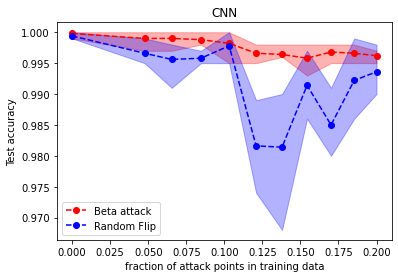

In [12]:
C = 1
model = "cnn"

beta_df_1 = pd.read_csv(osp.join(BASE_PATH, model, "beta_poison_k15.csv"))
beta_df_1 = beta_df_1.loc[beta_df_1['c '] == C]

beta_df_2 = pd.read_csv(osp.join(BASE_PATH, model, "flip.csv"))
beta_df_2 = beta_df_2.loc[beta_df_2['c '] == C]

# beta_df_3 = pd.read_csv(osp.join(BASE_PATH, model, "flip.csv"))
# beta_df_3 = beta_df_3.loc[beta_df_3['c '] == C]

beta_agg_1 = beta_df_1.groupby("poison_fraction ")['test_acc '].agg(low='min',high='max',mean='mean')
beta_agg_1.reset_index(inplace=True)

beta_agg_2 = beta_df_2.groupby("poison_fraction ")['test_acc '].agg(low='min',high='max',mean='mean')
beta_agg_2.reset_index(inplace=True)

# beta_agg_3 = beta_df_3.groupby("poison_fraction ")['test_acc '].agg(low='min',high='max',mean='mean')
# beta_agg_3.reset_index(inplace=True)

ax = beta_agg_1.plot(x='poison_fraction ', y='mean', c='r', linestyle='--', marker='o', label= "Beta attack")
beta_agg_2.plot(x='poison_fraction ', y='mean', c='b', linestyle='--', marker='o', label= "Random Flip", ax=ax)
# beta_agg_3.plot(x='poison_fraction ', y='mean', c='g', linestyle='--', marker='o', label="label flip attack", ax=ax)

plt.fill_between(x='poison_fraction ',y1='low',y2='high', data=beta_agg_1, color=(1., 0., 0., 0.3))
plt.fill_between(x='poison_fraction ',y1='low',y2='high', data=beta_agg_2, color=(0., 0., 1., 0.3))
# plt.fill_between(x='poison_fraction ',y1='low',y2='high', data=beta_agg_3, color=(0, 1, 0, 0.3))

plt.xlabel("fraction of attack points in training data")
plt.ylabel('Test accuracy')
# plt.title("SVM C=1")
plt.title(f"CNN")
plt.savefig("cnn-beta-flip.png")

In [39]:
beta_df_1

,algorithm,lb,tr_size,n_poison,poison_fraction,c,val_acc,test_acc,time
0,beta_poison_k15,1,400,0,0.000000,1,0.998,0.998,0.185130
1,beta_poison_k15,1,400,20,0.047619,1,0.920,0.923,4.697099
2,beta_poison_k15,1,400,28,0.065421,1,0.897,0.915,6.858106
3,beta_poison_k15,1,400,37,0.084668,1,0.816,0.838,4.949514
4,beta_poison_k15,1,400,46,0.103139,1,0.801,0.837,11.497416
5,beta_poison_k15,1,400,55,0.120879,1,0.738,0.785,12.586580
6,beta_poison_k15,1,400,64,0.137931,1,0.675,0.734,17.163266
7,beta_poison_k15,1,400,73,0.154334,1,0.704,0.752,21.100265
8,beta_poison_k15,1,400,82,0.170124,1,0.623,0.699,28.154121
9,beta_poison_k15,1,400,91,0.185336,1,0.613,0.705,25.963642
